<center>
<img src="img/colorido-horizontal-ufc.png" alt="Drawing" style="width: 500px;"/>
</center>

## Introdução aos Métodos de Montecarlo

### Aula 03: Importance sampling

Prof. Saulo Reis (Depto. de Física - UFC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def direct_gamma(N, gamma):
    S = 0  # Inicializa a soma
    for i in range(1, N+1):
        x_i = np.random.uniform(0, 1)  # Gera um número aleatório uniforme entre 0 e 1
        S += x_i ** gamma  # Atualiza a soma com x_i^gamma (soma acumulada)
    
    return S / N  # Retorna a média ponderada Σ/N

In [3]:
# Exemplo de uso da função
N = 10000  # Número de iterações
gamma = 2  # Valor exemplo de gamma
resultado = direct_gamma(N, gamma)
resultado

0.33061227383265623

In [4]:
N = 1000000
gamma = -0.8
resultado = direct_gamma(N, gamma)
resultado

5.056044856299886

In [5]:
def direct_gamma_zeta(N, gamma, zeta):
    S = 0  # Inicializa a soma
    for i in range(1, N+1):
        # Gera um número aleatório uniforme entre 0 e 1, elevado a 1/(zeta + 1)
        x_i = np.random.uniform(0, 1) ** (1 / (zeta + 1))  
        # Atualiza a soma com x_i^(-zeta) (soma acumulada)
        S += x_i ** (gamma-zeta)
    
    return S / N  # Retorna a média ponderada Σ/N

In [6]:
# Exemplo de uso da função
N = 10000  # Número de iterações
gamma = 2 # Valor exemplo de gamma
zeta = 0  # Valor exemplo de zeta
resultado = direct_gamma_zeta(N, gamma, zeta)
resultado

0.3328212220970762

In [7]:
N = 1000000
gamma = -0.8
zeta = -0.7
resultado = direct_gamma_zeta(N, gamma, zeta)
resultado

1.5007908548087296

In [8]:
def markov_zeta(x, delta, zeta):
    # Geração de novo candidato x_til dentro do intervalo (x - delta, x + delta)
    x_til = x + random.uniform(-delta, delta)
    
    # Verifica se o novo valor candidato está no intervalo permitido (0 < x_til < 1)
    if 0 < x_til < 1:
        # Calcula a probabilidade de aceitação
        p_accept = (x_til / x) ** zeta
        
        # Gera um número aleatório entre 0 e 1 e decide se aceita o novo valor
        if random.uniform(0, 1) < p_accept:
            x = x_til  # Atualiza x para o novo valor se for aceito
            
    return x

Text(0.5, 1.0, 'zeta = -0.80')

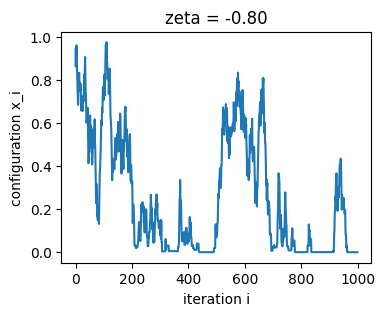

In [17]:
x_inicial = 1
delta = 0.1
zeta = -0.8
num_iteracoes = 1000

x_samples = []
# Realiza a cadeia de Markov para 'num_iteracoes'
for _ in range(num_iteracoes):
    x_inicial = markov_zeta(x_inicial, delta, zeta)
    x_samples.append(x_inicial)

plt.figure(figsize=(4, 3))
plt.plot(x_samples)
plt.xlabel('iteration i')
plt.ylabel('configuration x_i')
plt.title(f'zeta = {zeta:.2f}')

Text(0.5, 1.0, 'zeta = -1.60')

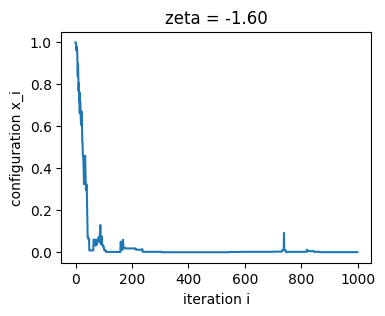

In [18]:
x_inicial = 1
delta = 0.1
zeta = -1.6
num_iteracoes = 1000

x_samples = []
# Realiza a cadeia de Markov para 'num_iteracoes'
for _ in range(num_iteracoes):
    x_inicial = markov_zeta(x_inicial, delta, zeta)
    x_samples.append(x_inicial)

plt.figure(figsize=(4, 3))
plt.plot(x_samples)
plt.xlabel('iteration i')
plt.ylabel('configuration x_i')
plt.title(f'zeta = {zeta:.2f}')